In [1]:
import re, os, sys, json, time, requests
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
# TODO load config.json, load eval.parquet
fs = sorted(Path('../outputs').glob('**/eval.parquet'))
fs

[PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_03-58-02/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_04-44-47/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_05-10-42/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_05-38-03/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_06-05-09/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_08-48-36/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu/2025-06-18_09-02-36/eval.parquet'),
 PosixPath('../outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-

In [3]:
def load_config_df(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    config.update(config.pop('post'))
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    return config_df


df = pd.concat([load_config_df(f) for f in fs])
df.columns

# load_config(fs[0])

allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-ETHER-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-None-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-None-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-None-InnerDPO_alpaca_mmlu
allenai-OLMo-2-0425-1B-SFT_hs-No

Index(['lr', 'weight_decay', 'gradient_clip_val', 'ideal_batch_size',
       'pl_precision', 'num_workers', 'dataset', 'verbose', 'seed', 'patience',
       'dev', 'load_in_4bit', 'load_in_8bit', 'use_grad_paging', 'n_samples',
       'eval_samples', 'max_length', 'max_prompt_length', 'base_model',
       'batch_size', 'save', 'wandb', 'use_policy_weights', 'logp_agg_type',
       'loss_type', 'β', 'group_name', 'adapter_name', 'human_name',
       'short_name', 'long_name', 'model_fname', 'ds_name_train', 'run_fname',
       'save_dir', 'ts', 'file', 'method', 'collection_layers',
       'collect_input', 'collect_hs', 'use_wpo'],
      dtype='object')

In [4]:
def load_config(f):
    print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config['file'] = f
    config['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config['method'] = method

    return config


# df = pd.concat([load_config(f) for f in fs])
# df.columns

load_config(fs[0])

allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu


{'lr': 0.0001,
 'weight_decay': 0.0,
 'gradient_clip_val': 10.0,
 'ideal_batch_size': 16,
 'pl_precision': 'bf16',
 'num_workers': 8,
 'dataset': 'alpaca_mmlu',
 'verbose': 2,
 'seed': 42,
 'patience': 3,
 'dev': False,
 'load_in_4bit': False,
 'load_in_8bit': False,
 'use_grad_paging': False,
 'n_samples': 10000,
 'eval_samples': 300,
 'max_length': 512,
 'max_prompt_length': 450,
 'base_model': 'allenai/OLMo-2-0425-1B-SFT',
 'batch_size': 20,
 'save': True,
 'wandb': True,
 'use_policy_weights': False,
 'logp_agg_type': 'ipo',
 'loss_type': 'SimPER',
 'β': 0.4,
 'post': {'group_name': 'alpaca_mmlu-OLMo-2-0425-1B-SFT',
  'adapter_name': 'dpo',
  'human_name': 'Dpo lr=0.0001',
  'short_name': 'Dpo 0001',
  'long_name': 'lr=0.0001 verbose=2',
  'model_fname': 'allenai-OLMo-2-0425-1B-SFT_dpo_alpaca_mmlu',
  'ds_name_train': 'alpaca_mmlu',
  'run_fname': 'dpo/0001/035802',
  'save_dir': '/workspace/repr-preference-optimization/outputs/alpaca_mmlu-OLMo-2-0425-1B-SFT/allenai-OLMo-2-0425-1B-

In [5]:
# TODO add seed, train, other parts from config
def load_config(f):
    # print(f.parent.parent.stem)
    config = json.load((f.parent / 'config.json').open())
    # print(config)
    # log = (f.parent / 'log.txt').open().read()

    # dataframe of all non list/dict/tuple in config
    config_df = pd.DataFrame({k: v for k, v in config.items() if not isinstance(v, (list, dict, tuple))}, index=[0])
    # config_df['log'] = log
    config_df['file'] = f
    config_df['ts'] = f.parent.stem
    _, method, _ = f.parent.parent.stem.split('_', 2) # this is {model}_{method}_{dataset}
    config_df['method'] = method

    df = pd.read_parquet(f)
    df['seed'] = config.get('seed', 0)  # default to 0 if not present
    df['train'] = config['dataset']
    df['base_model'] = config['base_model']
    df['ts'] = config_df['ts']
    for k in config:
        if isinstance(config[k], (list, tuple)):
            continue
        if isinstance(config[k], dict):
            for j in config[k]:
                if isinstance(j, (list, dict, tuple)):
                    continue
                # print(f'Adding {k}_{j} to df')
                df[f'{k}.{j}'] = config[k][j]
            continue
        df[k] = config[k]


    return df

df_res2 = pd.concat([load_config(f) for f in fs])
df_res2.columns

Index(['model', 'dataset', 'ds_i', 'correct', 'prob', 'score__sigmoid',
       'score__log_ratio', 'score__correct', 'score__chosen_log_score',
       'score__rejected_log_score', '_chosen_logps', '_rejected_logps',
       '_chosen_ppl', '_rejected_ppl', '_l_chosen', '_l_rejected', 'adapter',
       'seed', 'train', 'target', 'type', 'label', 'category', 'ds_name_nice',
       'base_model', 'ts', 'lr', 'weight_decay', 'gradient_clip_val',
       'ideal_batch_size', 'pl_precision', 'num_workers', 'verbose',
       'patience', 'dev', 'load_in_4bit', 'load_in_8bit', 'use_grad_paging',
       'n_samples', 'eval_samples', 'max_length', 'max_prompt_length',
       'batch_size', 'save', 'wandb', 'use_policy_weights', 'logp_agg_type',
       'loss_type', 'β', 'post.group_name', 'post.adapter_name',
       'post.human_name', 'post.short_name', 'post.long_name',
       'post.model_fname', 'post.ds_name_train', 'post.run_fname',
       'post.save_dir', 'post.ts', 'collection_layers', 'collect_inp

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [7]:
from reprpo.data.util import sort_str, nice_ds_name

# df_res2.columns

In [8]:
from reprpo.data.util import df_sort_cols

In [9]:
df_res2['adapter'].value_counts()

adapter
none                       92700
hs-None-InnerDPO           30500
hs-ETHER-InnerDPO          25600
dpo                        23800
hs-SupressedHS-InnerDPO     6400
side-None-InnerDPO          6400
Name: count, dtype: int64

In [10]:
from reprpo.helpers.tyro import make_shorter, acronym

df_res2['adapter2'] = df_res2['post.adapter_name'] + ' ' + df_res2['post.long_name'].fillna('none')# + df_res2['post.ts']
m = df_res2['adapter'] =='none'
df_res2.loc[m, 'adapter2'] = 'none'
df_res2['adapter2'].value_counts()

df_res2['adapter2'] = df_res2['adapter2'].apply(acronym).apply(make_shorter)

In [11]:
# Get unique types for determining subplot count
def plot_multi_barh(run_stats2):
    types = run_stats2['type'].unique()
    fig, axes = plt.subplots(1, len(types), figsize=(12, 1 * len(types)), sharex=False, sharey=True)

    # If there's only one type, make axes iterable
    if len(types) == 1:
        axes = [axes]

    # Create a plot for each type
    for i, (k, g) in enumerate(run_stats2.groupby('type')):
        ax = axes[i]
        
        g = g.copy()
        hue_order = sort_str(run_stats2.adapter2.tolist(), first=['n', 'none', 'dpo'], sort_middle=True, unique=True)

            
        # Create the bar plot on the specific axis
        sns.barplot(data=g, 
                    y='adapter2',
                    x='correct',
                    errorbar='sd', 
                    orient='h',
                    order=hue_order,
                    ax=ax)
            
        # Set x limits to focus on the range of values
        ax.set_xlim(g['correct'].min() * 0.99 - 0.01, g['correct'].max() * 1.01 + 0.01)

        ax.set_xlabel(f'Acc - {k}')
        
        # Only show y-labels (adapter names) on the first subplot
        if i > 0:
            ax.set_ylabel('')
        

    plt.tight_layout()

('allenai/OLMo-2-0425-1B-SFT', 'alpaca_mmlu', np.int64(10000))


ds_name_nice,alignment_robustness (punishment_avoidance_test ),alignment_robustness (sycophancy_mimicry_test ),alignment_robustness (unhelpful_alpaca_test ),alignment_robustness (wrong_arc_test ),cross_domain (comma_separated_input_test ),in_domain (alpaca_mmlu_test ),moral_transfer (ethics_justice_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,,,
hs-ETHER-I ColHs=1 001,0.480±nan,0.396±nan,0.353±nan,0.444±nan,0.603±nan,0.593±nan,0.587±nan,0.280±nan
dpo 001,0.503±nan,0.472±nan,0.290±nan,0.380±nan,0.620±nan,0.613±nan,0.463±nan,0.347±nan
hs-ETHER-I ColHs=1 0001,0.563±nan,0.664±nan,0.157±nan,0.296±nan,0.703±nan,0.730±nan,0.373±nan,0.230±nan
n,0.587±nan,0.740±nan,0.423±nan,0.300±nan,0.750±nan,0.803±nan,0.420±nan,0.273±nan
dpo LosTyp=ipo,0.607±nan,0.704±nan,0.370±nan,0.260±nan,0.757±nan,0.807±nan,0.423±nan,0.273±nan
dpo LosTyp=dpo,0.610±nan,0.720±nan,0.370±nan,0.236±nan,0.753±nan,0.800±nan,0.430±nan,0.273±nan
dpo 0001,0.610±nan,0.616±nan,0.133±nan,0.312±nan,0.733±nan,0.737±nan,0.360±nan,0.237±nan
hs-n-IPO ColHs=1 α=0.25,0.613±nan,0.780±nan,0.347±nan,0.212±nan,0.757±nan,0.757±nan,0.417±nan,0.270±nan
hs-n-IPO ColHs=1 α=1,0.613±nan,0.832±nan,0.410±nan,0.216±nan,0.753±nan,0.753±nan,0.420±nan,0.270±nan


type,in_domain,alignment_robustness,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,,
dpo,0.763±nan,0.480±nan,0.753±nan,0.417±nan,0.263±nan
dpo 0001,0.737±nan,0.414±nan,0.733±nan,0.360±nan,0.237±nan
dpo 001,0.613±nan,0.410±nan,0.620±nan,0.463±nan,0.347±nan
dpo LosTyp=dpo,0.800±nan,0.485±nan,0.753±nan,0.430±nan,0.273±nan
dpo LosTyp=ipo,0.807±nan,0.485±nan,0.757±nan,0.423±nan,0.273±nan
dpo lr=1e-05,0.767±nan,0.511±nan,0.737±nan,0.393±nan,0.243±nan
hs-ETHER-I ColHs=1,0.763±nan,0.485±nan,0.757±nan,0.413±nan,0.267±nan
hs-ETHER-I ColHs=1 0001,0.730±nan,0.415±nan,0.703±nan,0.373±nan,0.230±nan
hs-ETHER-I ColHs=1 001,0.593±nan,0.418±nan,0.603±nan,0.587±nan,0.280±nan


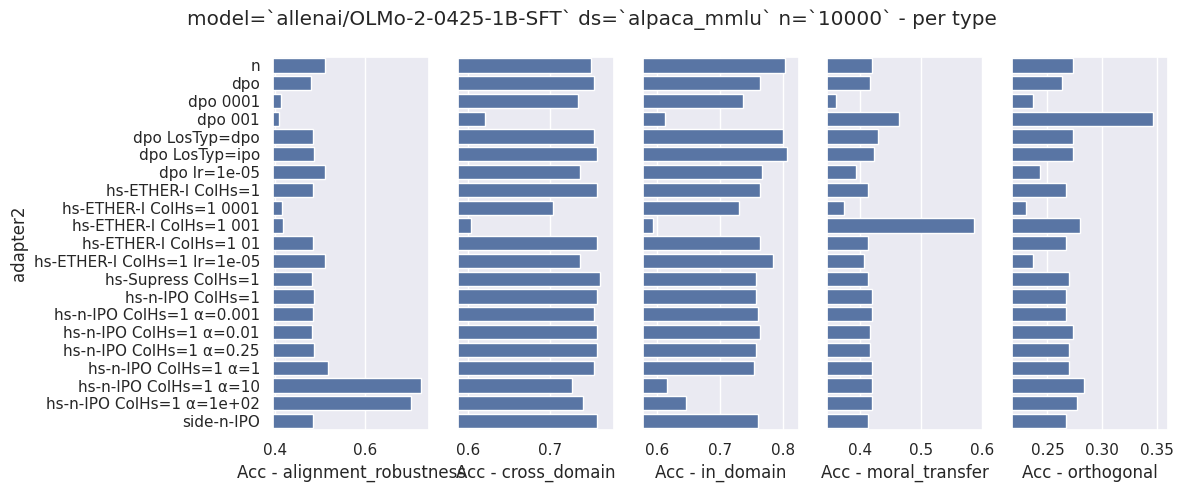

('allenai/OLMo-2-0425-1B-SFT', 'us_history', np.int64(10000))


ds_name_nice,cross_domain (code_test ),cross_domain (math_test ),cross_domain (us_history_textbook_test ),in_domain (us_history_test ),moral_transfer (ethics_justice_test ),orthogonal (medical_dpo_v2_test_data )
adapter/ds,,,,,,
hs-ETHER-I ColHs=1 0001,0.440±nan,0.503±nan,0.510±nan,0.413±nan,0.497±nan,0.620±nan
hs-ETHER-I ColHs=1 001,0.510±nan,0.540±nan,0.543±nan,0.513±nan,0.487±nan,0.597±nan
hs-n-IPO ColHs=1 01,0.897±nan,0.803±nan,0.977±nan,0.913±nan,0.400±nan,0.237±nan
hs-Supress ColHs=1,0.900±nan,0.823±nan,0.980±nan,0.920±nan,0.403±nan,0.230±nan
hs-n-IPO ColHs=1 ε=0.01,0.900±nan,0.810±nan,0.977±nan,0.913±nan,0.400±nan,0.237±nan
hs-n-IPO ColHs=1 ε=1e-09,0.900±nan,0.820±nan,0.977±nan,0.913±nan,0.400±nan,0.237±nan
hs-n-IPO ColHs=1 UsePolW=1,0.900±nan,0.810±nan,0.973±nan,0.920±nan,0.403±nan,0.237±nan
hs-n-IPO ColHs=1 p=1,0.903±nan,0.823±nan,0.983±nan,0.913±nan,0.400±nan,0.230±nan
hs-n-IPO ColHs=1 lr=1e-05,0.903±nan,0.837±nan,0.987±nan,0.917±nan,0.397±nan,0.243±nan


type,in_domain,cross_domain,moral_transfer,orthogonal
adapter / distribution_shift,,,,
dpo 0001,0.917±nan,0.902±nan,0.350±nan,0.227±nan
dpo lr=1e-05,0.910±nan,0.907±nan,0.397±nan,0.240±nan
hs-ETHER-I ColHs=1,0.940±nan,0.887±nan,0.377±nan,0.237±nan
hs-ETHER-I ColHs=1 0001,0.413±nan,0.484±nan,0.497±nan,0.620±nan
hs-ETHER-I ColHs=1 001,0.513±nan,0.531±nan,0.487±nan,0.597±nan
hs-ETHER-I ColHs=1 01,0.943±nan,0.888±nan,0.377±nan,0.240±nan
hs-Supress ColHs=1,0.920±nan,0.901±nan,0.403±nan,0.230±nan
hs-n-IPO ColHs=1 0001,0.903±nan,0.899±nan,0.390±nan,0.240±nan
hs-n-IPO ColHs=1 01,0.913±nan,0.892±nan,0.400±nan,0.237±nan


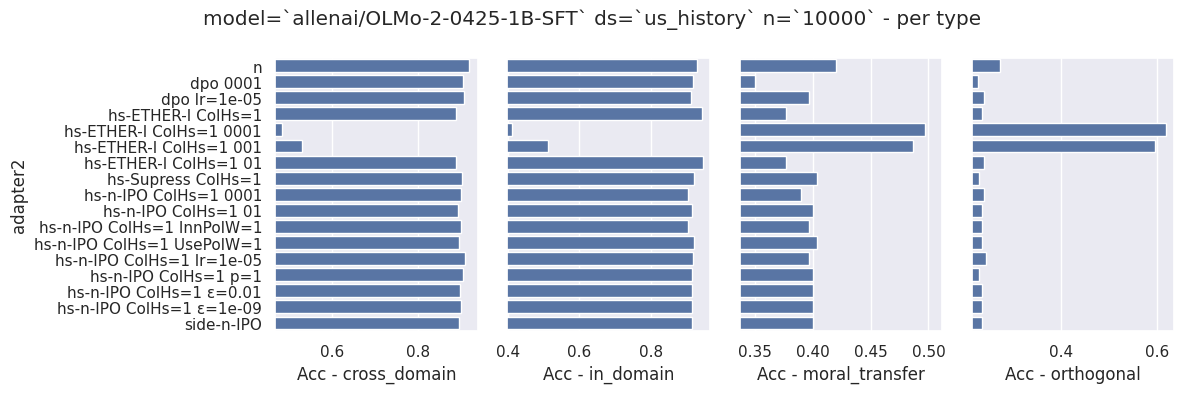

In [12]:
for train_set, group in df_res2.groupby(['base_model', "train", 'n_samples']): # TODO also dev, n_samples
    print(train_set)

    run_stats = group.groupby(["seed", "ds_name_nice", "adapter2"])['correct'].mean().reset_index()
    stats = run_stats.groupby(["ds_name_nice", "adapter2"])['correct'].agg(['mean','std']).reset_index()
    mean_df = stats.pivot(index='adapter2', columns='ds_name_nice', values='mean')
    std_df = stats.pivot(index='adapter2', columns='ds_name_nice', values='std')
    # sort adapters by mean on first dataset column
    mean_df = mean_df.sort_values(by=mean_df.columns[0], axis=0)

    mean_df = df_sort_cols(mean_df, first=['base','none'])

    mean_df.index.name = 'adapter/ds'
    # combine mean and std into strings
    df_res_ds = mean_df.copy()
    for col in mean_df.columns:
        df_res_ds[col] = mean_df[col].combine(std_df[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_ds)

    # per-run means for distribution shift types
    run_stats2 = group.groupby(["seed", "type", "adapter2"])['correct'].mean().reset_index().sort_values('correct')
    stats2 = run_stats2.groupby(["type", "adapter2"])['correct'].agg(['mean','std']).reset_index()


    mean2 = stats2.pivot(index='adapter2', columns='type', values='mean')
    std2 = stats2.pivot(index='adapter2', columns='type', values='std')

    mean2 = df_sort_cols(mean2, first=['in_domain'], last=['orthogonal'])
    mean2 = df_sort_cols(mean2.T, first=['base','none']).T

    mean2.index.name = 'adapter / distribution_shift'
    # combine mean and std into strings
    df_res_type = mean2.copy()
    for col in mean2.columns:
        df_res_type[col] = mean2[col].combine(std2[col], lambda m, s: f"{m:.3f}±{s:.3f}")
    display(df_res_type)

    # bar chart
    base_model = group['base_model'].iloc[0]
    if run_stats2.adapter2.nunique()>2:
        plot_multi_barh(run_stats2)
        plt.suptitle(f"model=`{base_model}` ds=`{train_set[1]}` n=`{train_set[2]}` - per type")
        plt.tight_layout()
        plt.show()

In [13]:
# for k,g in run_stats2.groupby('type'):
#     sns.barplot(data=g, 
#                 y='adapter2',
#                 x='correct',
#                 errorbar='sd', orient='h', 
#                 legend='brief',
#                 order=hue_order,
#     )
#     plt.xlim(g['correct'].min() * 0.99 - 0.01, g['correct'].max() *1.01+ 0.01)
#     plt.title(f"{train_set} {k}")
#     plt.show()